<a href="https://colab.research.google.com/github/waloar/pin2023-scoring/blob/main/datos_curso_pin_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

References:
[Default of Credit Card Clients Dataset](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset/code)


* [Logistic Regression Example](https://www.justintodata.com/logistic-regression-example-in-python/)
* [EDA and Logistic Regression](https://www.kaggle.com/code/fegadeharish/eda-and-logistic-regression)
* [Feature Selection](https://medium.com/@rithpansanga/logistic-regression-for-feature-selection-selecting-the-right-features-for-your-model-410ca093c5e0)
* [Logistic Regression Tutorial](https://www.justintodata.com/logistic-regression-for-machine-learning-tutorial/)

In [1]:
pip install toad

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 83.5 MB/s eta 0:00:00


In [2]:
pip install sidetable


# Notas
## dealing with Nan
Without much more information we can't give you guaranteed advice here.

* You can remove rows of data. However, this will cause problems if they are not randomly missing. For instance, the fact that they are missing may indicate something about them (such as they are not an engaged customer).
* You can impute values if you have a means to do so.
* You can remove columns of data with missing values.
* You can bin your data. Example: Answer1, Answer2, MissingValue.Other.
* You can determine that you do not have enough data in the sample to adequately represent the population you are trying to estimate and you can go get more data.




# Importa Librerias y Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import toad
import sidetable
import time
from toad.plot import  bin_plot, badrate_plot



In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
df = pd.read_csv('/content/drive/MyDrive/pin-ds2023/dato_curso_con_mora.csv')


# Explora los datos

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215549 entries, 0 to 215548
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   idPersona                215549 non-null  int64  
 1   sexo                     215549 non-null  object 
 2   tipoCliente              215549 non-null  object 
 3   tipoMora                 215549 non-null  object 
 4   figuraEnBoletin          215549 non-null  int64  
 5   situacionBCRA            156822 non-null  float64
 6   CantidadCreditos         215549 non-null  int64  
 7   deuda                    215549 non-null  float64
 8   ingreso_mensual_interno  215549 non-null  float64
 9   ingreso_mensual_afip     215549 non-null  float64
 10  ingreso_mensual_total    215549 non-null  float64
 11  monotributo              28487 non-null   object 
 12  categoria                215549 non-null  object 
 13  edad                     215549 non-null  float64
 14  dias

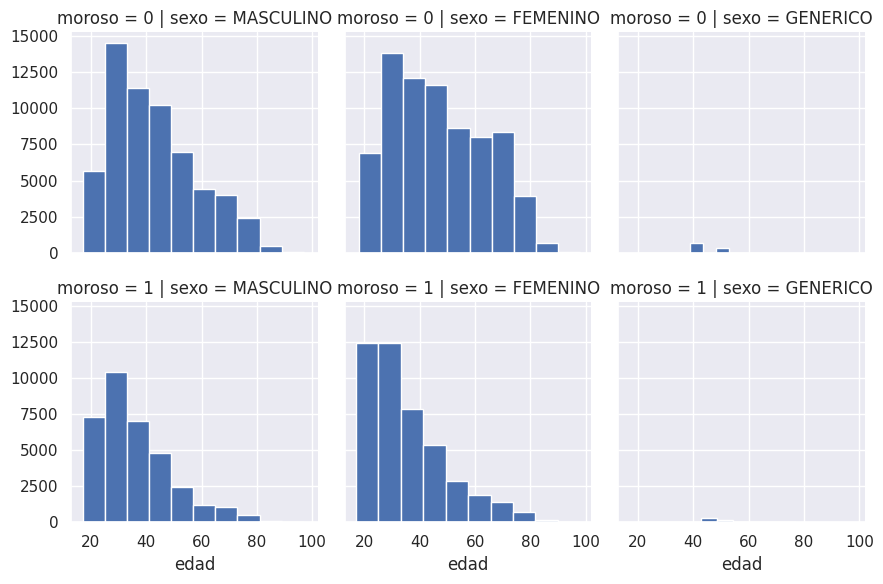

In [7]:
g = sns.FacetGrid(df, row='moroso', col='sexo')
g = g.map(plt.hist, 'edad')
plt.show()

### Plotea una matriz de correlacion entre los datos con un mapa de calor.

<ipython-input-8-1efde34fe039>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


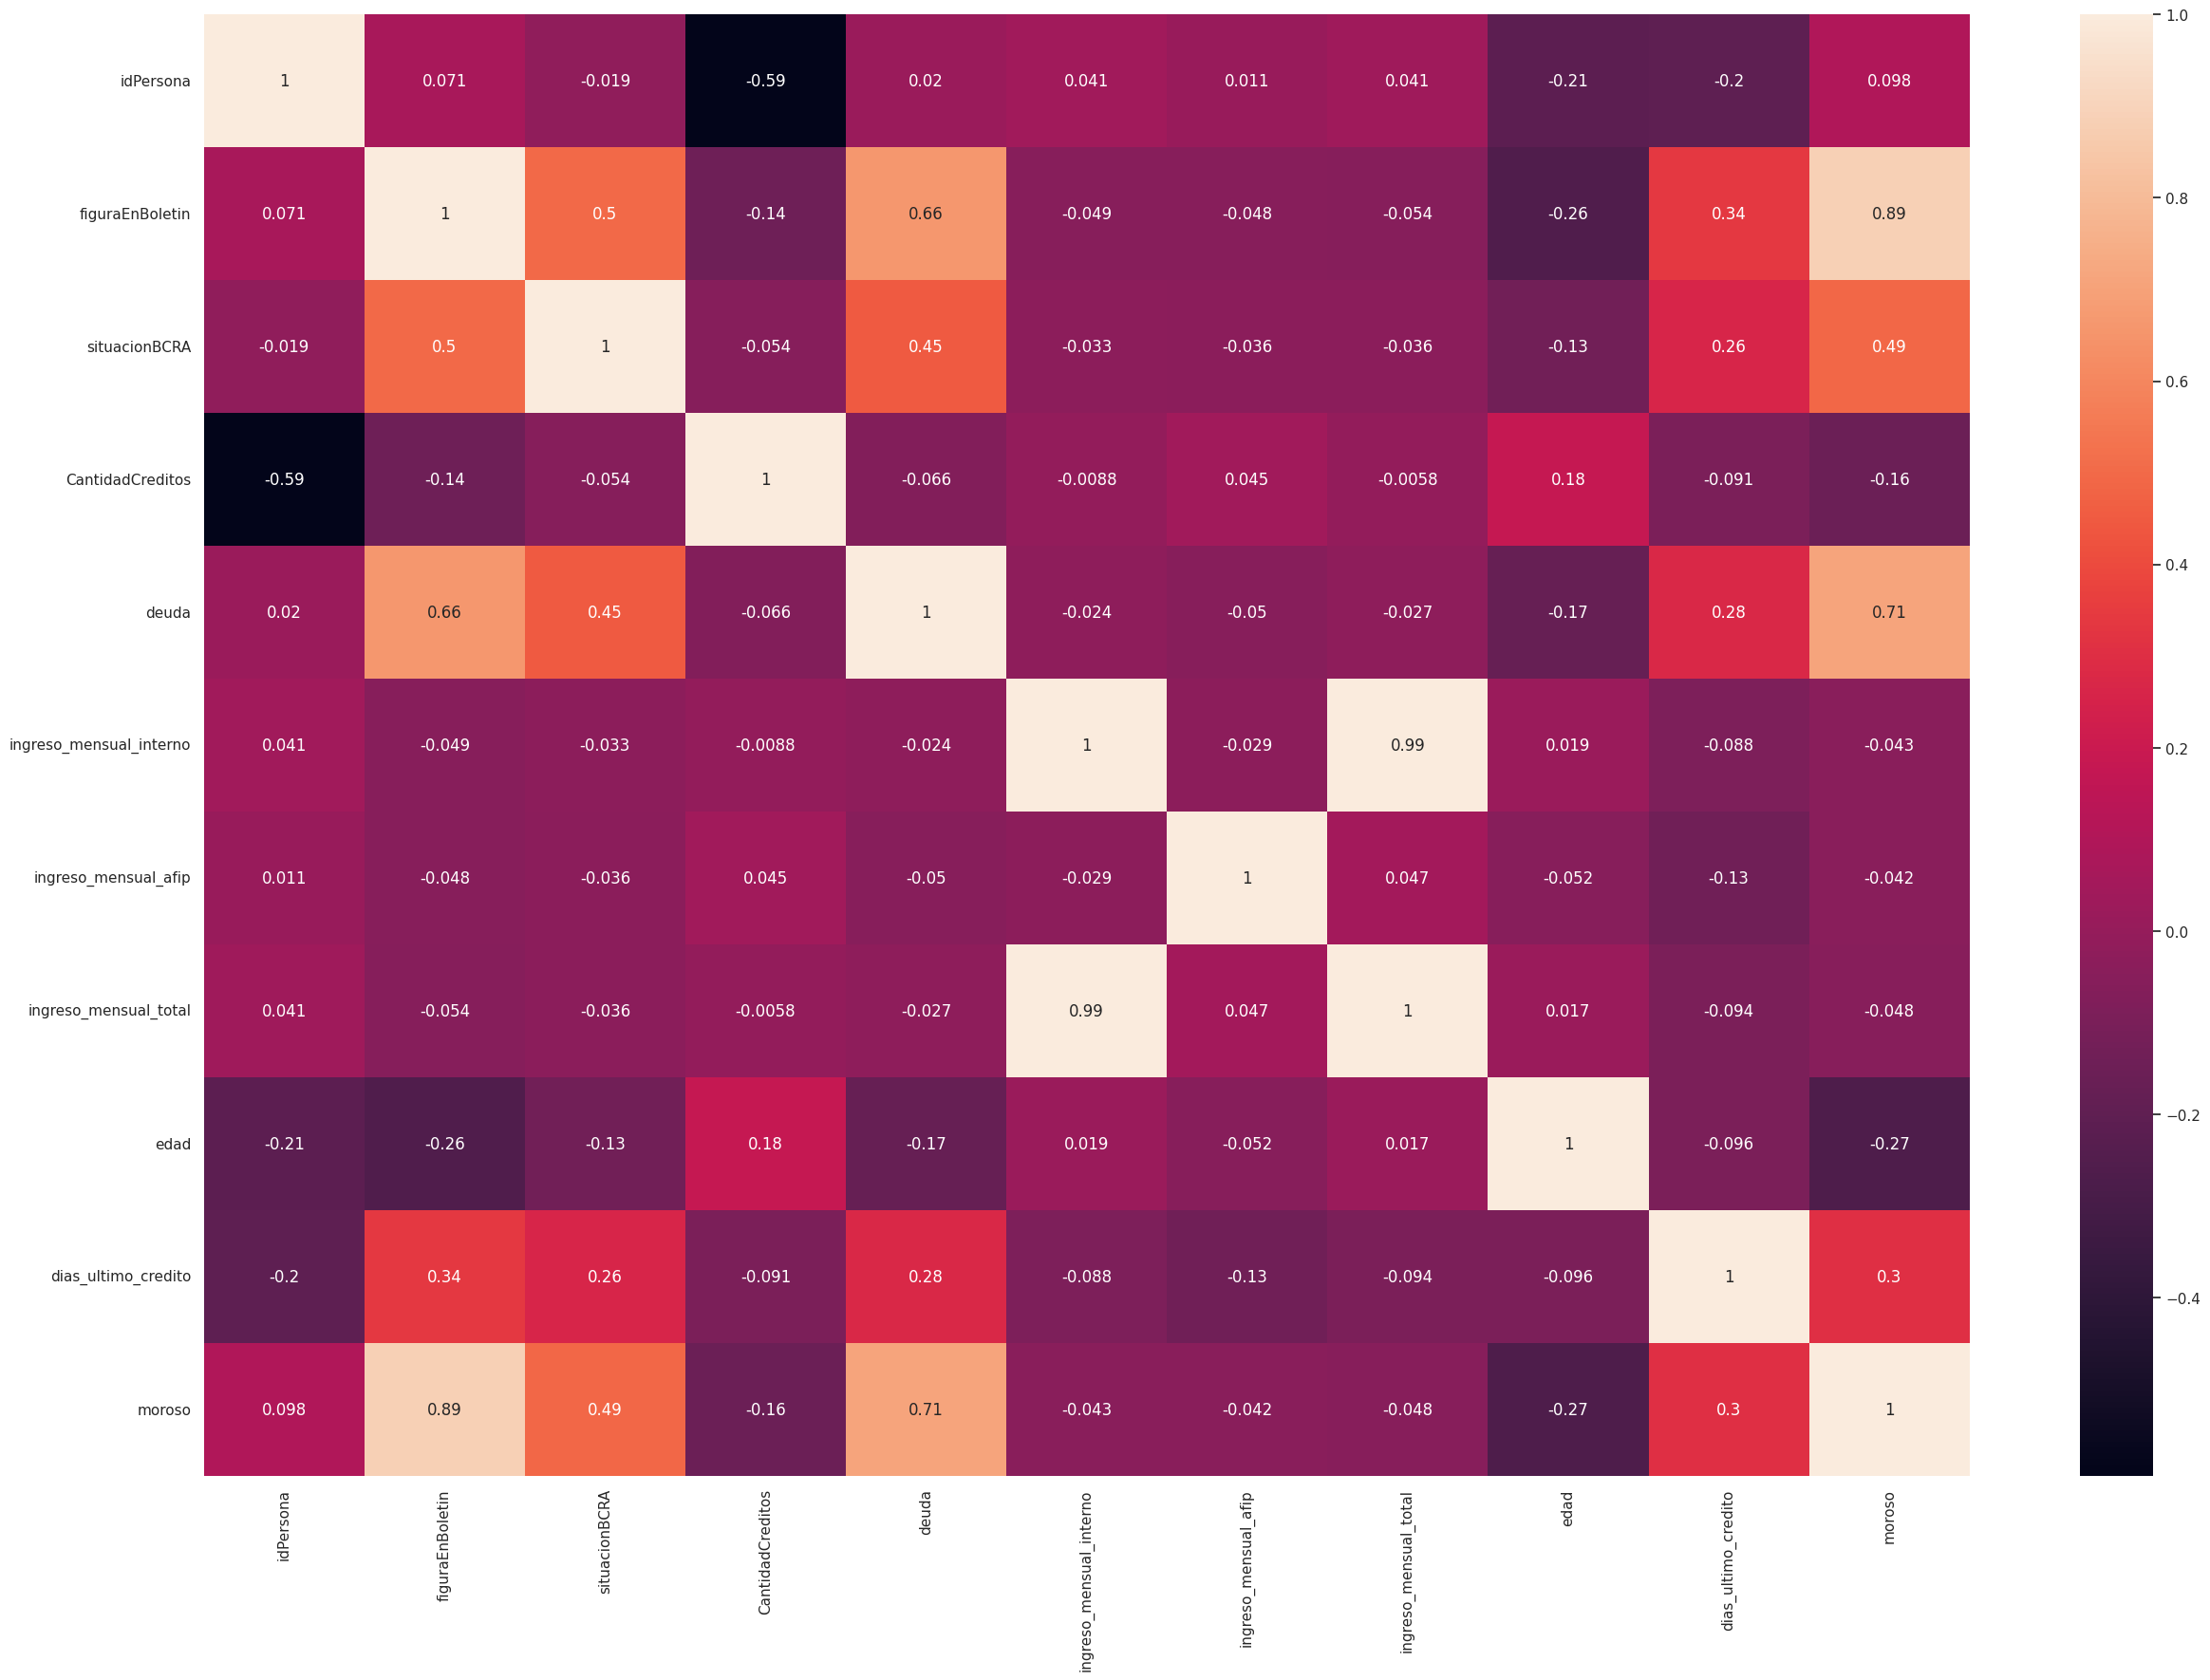

In [8]:
plt.subplots(figsize=(30,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215549 entries, 0 to 215548
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   idPersona                215549 non-null  int64  
 1   sexo                     215549 non-null  object 
 2   tipoCliente              215549 non-null  object 
 3   tipoMora                 215549 non-null  object 
 4   figuraEnBoletin          215549 non-null  int64  
 5   situacionBCRA            156822 non-null  float64
 6   CantidadCreditos         215549 non-null  int64  
 7   deuda                    215549 non-null  float64
 8   ingreso_mensual_interno  215549 non-null  float64
 9   ingreso_mensual_afip     215549 non-null  float64
 10  ingreso_mensual_total    215549 non-null  float64
 11  monotributo              28487 non-null   object 
 12  categoria                215549 non-null  object 
 13  edad                     215549 non-null  float64
 14  dias

In [10]:
df['tipoMora'].unique()

array(['BPG', 'M90', 'M18', 'MPE', 'M30', 'M60', 'M12', 'MTP'],
      dtype=object)

In [11]:
# bins = [['BPG','MTP'],['M30','M60','M90','M12'],['M180','MPE']]
# names = ['BPG','M30-120','M180-PE']
# df['tipoMora_bin'] = pd.cut(x=df.tipoMora, bins=bins, labels=names, right=True)


In [12]:
df['situacionBCRA'].unique()

array([ 1., nan,  5.,  3.,  2.,  4.])

## convierte situacionBCRA en string y elimina idPersona

In [13]:
 df['situacionBCRA']=df.situacionBCRA.astype("string")
 df=df.drop(['idPersona'], axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215549 entries, 0 to 215548
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   sexo                     215549 non-null  object 
 1   tipoCliente              215549 non-null  object 
 2   tipoMora                 215549 non-null  object 
 3   figuraEnBoletin          215549 non-null  int64  
 4   situacionBCRA            156822 non-null  string 
 5   CantidadCreditos         215549 non-null  int64  
 6   deuda                    215549 non-null  float64
 7   ingreso_mensual_interno  215549 non-null  float64
 8   ingreso_mensual_afip     215549 non-null  float64
 9   ingreso_mensual_total    215549 non-null  float64
 10  monotributo              28487 non-null   object 
 11  categoria                215549 non-null  object 
 12  edad                     215549 non-null  float64
 13  dias_ultimo_credito      215549 non-null  int64  
 14  moro

# Variables en Dummies
### Convierte las variables object en int mediante la funciona dummies
* Crea la columna nan de cada atributo.

In [15]:
df = pd.get_dummies(df,columns=['sexo','tipoMora','categoria','monotributo','tipoCliente','situacionBCRA'],dtype='int64',dummy_na=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215549 entries, 0 to 215548
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   figuraEnBoletin           215549 non-null  int64  
 1   CantidadCreditos          215549 non-null  int64  
 2   deuda                     215549 non-null  float64
 3   ingreso_mensual_interno   215549 non-null  float64
 4   ingreso_mensual_afip      215549 non-null  float64
 5   ingreso_mensual_total     215549 non-null  float64
 6   edad                      215549 non-null  float64
 7   dias_ultimo_credito       215549 non-null  int64  
 8   moroso                    215549 non-null  int64  
 9   sexo_FEMENINO             215549 non-null  int64  
 10  sexo_GENERICO             215549 non-null  int64  
 11  sexo_MASCULINO            215549 non-null  int64  
 12  sexo_nan                  215549 non-null  int64  
 13  tipoMora_BPG              215549 non-null  i

In [17]:
# change the datatype of categorical features from integer to category
# df.sexo = df.sexo.astype("string")
# df.tipoCliente = df.tipoCliente.astype("string")
# df.tipoMora = df.tipoMora.astype("string")
# df.situacionBCRA=df.situacionBCRA.astype("category")
# df.monotributo=df.monotributo.astype("string")
# df.categoria=df.categoria.astype("string")
# df.situacionBCRA=df.situacionBCRA.astype("string")
# df.figuraEnBoletin=df.figuraEnBoletin.astype("category")


In [18]:
df=df.drop(['sexo_nan','tipoCliente_nan','monotributo_nan','categoria_nan','tipoMora_nan','situacionBCRA_<NA>'], axis=1)

# Balancea la clase

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
from sklearn.feature_selection import SelectKBest, chi2,RFE

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Analiza el balanceo de la clase moroso

In [20]:
tab = round(df.stb.freq(['moroso']), 2)
print( 'Tabla de frecuencia: ' )
print(tab)

Tabla de frecuencia: 
   moroso   count  percent  cumulative_count  cumulative_percent
0       0  135139     62.7            135139                62.7
1       1   80410     37.3            215549               100.0


Balanceamos con resample (podemos usar SMOTE - probar)

In [21]:
#Downsampling and Upsampling
morosos = df[df['moroso'] == 1]
no_morosos  = df[df['moroso'] == 0]
print(morosos.shape)
print(no_morosos.shape)

(80410, 47)
(135139, 47)


In [22]:
# Upsampling
from sklearn.utils import resample

up = resample(morosos,
             replace = True,
             n_samples = len(no_morosos),
             random_state = 39)

print(up.shape)

sampling = pd.concat([up, no_morosos])

print(sampling['moroso'].value_counts())



(135139, 47)
1    135139
0    135139
Name: moroso, dtype: int64


In [23]:
tab = round(sampling.stb.freq(['moroso']), 2)
print( 'Tabla de frecuencia: ' )
print(tab)

Tabla de frecuencia: 
   moroso   count  percent  cumulative_count  cumulative_percent
0       1  135139     50.0            135139                50.0
1       0  135139     50.0            270278               100.0


In [24]:
round(sampling[sampling['moroso'].notna()].stb.freq(['moroso']),2)
sampling['moroso']=df.moroso.astype("category")


In [25]:
sampling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270278 entries, 155745 to 215548
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   figuraEnBoletin           270278 non-null  int64   
 1   CantidadCreditos          270278 non-null  int64   
 2   deuda                     270278 non-null  float64 
 3   ingreso_mensual_interno   270278 non-null  float64 
 4   ingreso_mensual_afip      270278 non-null  float64 
 5   ingreso_mensual_total     270278 non-null  float64 
 6   edad                      270278 non-null  float64 
 7   dias_ultimo_credito       270278 non-null  int64   
 8   moroso                    270278 non-null  category
 9   sexo_FEMENINO             270278 non-null  int64   
 10  sexo_GENERICO             270278 non-null  int64   
 11  sexo_MASCULINO            270278 non-null  int64   
 12  tipoMora_BPG              270278 non-null  int64   
 13  tipoMora_M12            

separameos los atributos a analizar de la clase a determinar (asi x_sampling tiene los datos analizables y y_sampling la clase)

In [26]:
X_sampling = sampling

y_sampling = sampling['moroso']
X_sampling.head()

,figuraEnBoletin,CantidadCreditos,deuda,ingreso_mensual_interno,ingreso_mensual_afip,ingreso_mensual_total,edad,dias_ultimo_credito,moroso,sexo_FEMENINO,...,monotributo_I,monotributo_J,monotributo_K,tipoCliente_N,tipoCliente_R,situacionBCRA_1.0,situacionBCRA_2.0,situacionBCRA_3.0,situacionBCRA_4.0,situacionBCRA_5.0
155745,1,1,16790.0,0.0,0.0,0.0,23.0,574,1,1,...,0,0,0,1,0,0,0,0,1,0
183070,1,1,114240.0,73602.0,0.0,73602.0,52.0,414,1,1,...,0,0,0,1,0,0,0,0,1,0
100823,1,1,53810.0,0.0,0.0,0.0,26.0,897,1,0,...,0,0,0,1,0,0,0,0,0,0
96160,1,2,210980.0,0.0,0.0,0.0,33.0,869,1,1,...,0,0,0,0,1,1,0,0,0,0
118861,1,9,155040.0,54167.0,0.0,54167.0,29.0,568,1,0,...,0,0,0,0,1,0,1,0,0,0


# Transforma variables numericas: Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_sampling[['CantidadCreditos','deuda','ingreso_mensual_interno','ingreso_mensual_afip','ingreso_mensual_total','edad','dias_ultimo_credito']]= scaler.fit_transform(X_sampling[['CantidadCreditos','deuda','ingreso_mensual_interno','ingreso_mensual_afip','ingreso_mensual_total','edad','dias_ultimo_credito']].to_numpy())




In [28]:
X_sampling.head()

,figuraEnBoletin,CantidadCreditos,deuda,ingreso_mensual_interno,ingreso_mensual_afip,ingreso_mensual_total,edad,dias_ultimo_credito,moroso,sexo_FEMENINO,...,monotributo_I,monotributo_J,monotributo_K,tipoCliente_N,tipoCliente_R,situacionBCRA_1.0,situacionBCRA_2.0,situacionBCRA_3.0,situacionBCRA_4.0,situacionBCRA_5.0
155745,1,-0.595398,-0.398923,-0.122076,-0.350121,-0.141598,-1.106618,0.142021,1,1,...,0,0,0,1,0,0,0,0,1,0
183070,1,-0.595398,1.176972,0.165434,-0.350121,0.144570,0.763770,-0.417562,1,1,...,0,0,0,1,0,0,0,0,1,0
100823,1,-0.595398,0.199740,-0.122076,-0.350121,-0.141598,-0.913130,1.271680,1,0,...,0,0,0,1,0,0,0,0,0,0
96160,1,-0.466252,2.741385,-0.122076,-0.350121,-0.141598,-0.461657,1.173753,1,1,...,0,0,0,0,1,1,0,0,0,0
118861,1,0.437772,1.836762,0.089516,-0.350121,0.069006,-0.719641,0.121037,1,0,...,0,0,0,0,1,0,1,0,0,0


# Seleccion de atributos relevantes
El modelo tiene muchos atributos que pueden ser correlacionados asi los eliminamos del modelo para mejorar su performance.
[Feature Selection](https://toad.readthedocs.io/en/stable/tutorial.html)

In [29]:
exclude_list = ['moroso'] #variables a excluir en el scorecard
x_sampling_selected, drop_lst = toad.selection.select(frame = X_sampling,
                                                target = X_sampling['moroso'],
                                                empty = 0.9,
                                                iv=0.03,
                                                corr = 0.7,
                                                return_drop = True,
                                                exclude = exclude_list)

In [30]:
print('eliminadas por vacios:' , drop_lst['empty'])
print('eliminadas por iv bajo: ' , drop_lst['iv'])
print('eliminadas por corr alta: ', drop_lst['corr'])

print( "keep: ", x_sampling_selected.shape[1],
      ", drop empty: ", len(drop_lst['empty']),
      ", drop iv: ", len(drop_lst['iv']),
      ", drop corr: ",len(drop_lst['corr']) )

x_sampling_selected.columns

eliminadas por vacios: []
eliminadas por iv bajo:  ['ingreso_mensual_afip' 'sexo_FEMENINO' 'sexo_GENERICO' 'sexo_MASCULINO'
 'categoria_MONOTRIBUTISTA' 'monotributo_A' 'monotributo_AC'
 'monotributo_AL' 'monotributo_AP' 'monotributo_AT' 'monotributo_AV'
 'monotributo_B' 'monotributo_C' 'monotributo_D' 'monotributo_E'
 'monotributo_F' 'monotributo_G' 'monotributo_H' 'monotributo_I'
 'monotributo_J' 'monotributo_K' 'situacionBCRA_2.0']
eliminadas por corr alta:  ['ingreso_mensual_interno' 'tipoCliente_R' 'figuraEnBoletin']
keep:  22 , drop empty:  0 , drop iv:  22 , drop corr:  3


Index(['CantidadCreditos', 'deuda', 'ingreso_mensual_total', 'edad',
       'dias_ultimo_credito', 'moroso', 'tipoMora_BPG', 'tipoMora_M12',
       'tipoMora_M18', 'tipoMora_M30', 'tipoMora_M60', 'tipoMora_M90',
       'tipoMora_MPE', 'tipoMora_MTP', 'categoria_DNI', 'categoria_JUBILADO',
       'categoria_RECIBO', 'tipoCliente_N', 'situacionBCRA_1.0',
       'situacionBCRA_3.0', 'situacionBCRA_4.0', 'situacionBCRA_5.0'],
      dtype='object')

In [31]:
toad.quality(x_sampling_selected, 'moroso', iv_only = True)

,iv,gini,entropy,unique
tipoMora_BPG,14.208503,NaN,NaN,2.0
deuda,11.405451,NaN,NaN,19247.0
tipoMora_MPE,6.814351,NaN,NaN,2.0
tipoMora_M18,3.567003,NaN,NaN,2.0
tipoCliente_N,1.075772,NaN,NaN,2.0
dias_ultimo_credito,0.985802,NaN,NaN,1086.0
situacionBCRA_1.0,0.653912,NaN,NaN,2.0
tipoMora_MTP,0.391824,NaN,NaN,2.0
edad,0.369072,NaN,NaN,82.0
ingreso_mensual_total,0.355435,NaN,NaN,34333.0


### If the IV statistic is:
* Less than 0.02, then the predictor is not useful for modeling (separating the Goods from the Bads)
* 0.02 to 0.1, then the predictor has only a weak relationship to the Goods/Bads odds ratio
* 0.1 to 0.3, then the predictor has a medium strength relationship to the Goods/Bads odds ratio
* 0.3 to 0.5, then the predictor has a strong relationship to the Goods/Bads odds ratio.
* over 0.5, suspicious relationship (Check once)

In [32]:
x_sampling_selected=x_sampling_selected.drop(['tipoMora_BPG','deuda','tipoMora_MPE','tipoMora_M18','tipoCliente_N'],axis=1)

# Split de datos

In [33]:
proporcion_test = 0.35
#X_train,X_test,y_train,y_test= train_test_split(X_sampling,y_sampling,test_size=0.20,random_state=42)
train, test = train_test_split(x_sampling_selected, test_size = proporcion_test, random_state = 42)

tab_train = round(train.stb.freq(['moroso']), 2)
tab_test = round(test.stb.freq(['moroso']), 2)


Feature selection (Wrapper mode)
SelectFromModel -> selecting features based on importance weights

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175680 entries, 63744 to 87479
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   CantidadCreditos       175680 non-null  float64 
 1   ingreso_mensual_total  175680 non-null  float64 
 2   edad                   175680 non-null  float64 
 3   dias_ultimo_credito    175680 non-null  float64 
 4   moroso                 175680 non-null  category
 5   tipoMora_M12           175680 non-null  int64   
 6   tipoMora_M30           175680 non-null  int64   
 7   tipoMora_M60           175680 non-null  int64   
 8   tipoMora_M90           175680 non-null  int64   
 9   tipoMora_MTP           175680 non-null  int64   
 10  categoria_DNI          175680 non-null  int64   
 11  categoria_JUBILADO     175680 non-null  int64   
 12  categoria_RECIBO       175680 non-null  int64   
 13  situacionBCRA_1.0      175680 non-null  int64   
 14  situacionBCRA_3.0

In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94598 entries, 183289 to 93896
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   CantidadCreditos       94598 non-null  float64 
 1   ingreso_mensual_total  94598 non-null  float64 
 2   edad                   94598 non-null  float64 
 3   dias_ultimo_credito    94598 non-null  float64 
 4   moroso                 94598 non-null  category
 5   tipoMora_M12           94598 non-null  int64   
 6   tipoMora_M30           94598 non-null  int64   
 7   tipoMora_M60           94598 non-null  int64   
 8   tipoMora_M90           94598 non-null  int64   
 9   tipoMora_MTP           94598 non-null  int64   
 10  categoria_DNI          94598 non-null  int64   
 11  categoria_JUBILADO     94598 non-null  int64   
 12  categoria_RECIBO       94598 non-null  int64   
 13  situacionBCRA_1.0      94598 non-null  int64   
 14  situacionBCRA_3.0      94598 non-

# Regresion Logistica


In [36]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score


In [37]:
exclude_list=['moroso']
features_use = [feat for feat in train.columns if feat not in exclude_list]
len(features_use)

16

In [38]:
lr = LogisticRegression(random_state = 42, max_iter = 200, C = 0.1, penalty = 'l2', solver = 'newton-cg', class_weight='balanced').fit(X = train[features_use],
             y = train['moroso'] )


In [ ]:
def check_train_test_auc(x_train, y_train, x_test, y_test):
    from sklearn.linear_model import LogisticRegression

    lr = LogisticRegression(random_state = 42, max_iter = 200, C = 0.1, penalty = 'l2', solver = 'newton-cg', class_weight='balanced').fit(x_train, y_train)

    pred_train = lr.predict_proba(x_train)[:,1] ##[:1] es que lo hace de a uno
    lr.score(x_train, y_train) # mide accuracy

    from toad.metrics import KS, AUC

    print('train KS', KS(pred_train, y_train))
    print('train AUC',  AUC(pred_train, y_train))

    pred_OOT = lr.predict_proba(x_test)[:,1]
    print('Test KS', KS(pred_OOT, y_test))
    print('Test AUC', AUC(pred_OOT, y_test))

    from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, RocCurveDisplay, classification_report
    from sklearn.metrics import roc_curve, auc

    ## Como plot_roc_curve no existe más, reemplacé por esto
    y_pred_logistic = lr.decision_function(x_test)
    logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
    auc_logistic = auc(logistic_fpr, logistic_tpr)
    plt.figure(figsize=(5,5), dpi=100)
    plt.plot(logistic_fpr, logistic_tpr, marker= '.', label='logistic (auc = %0.3f)' % auc_logistic)

train KS 0.6046964208999442
train AUC 0.8809189358452066
Test KS 0.6036942514387346
Test AUC 0.8788982523489799


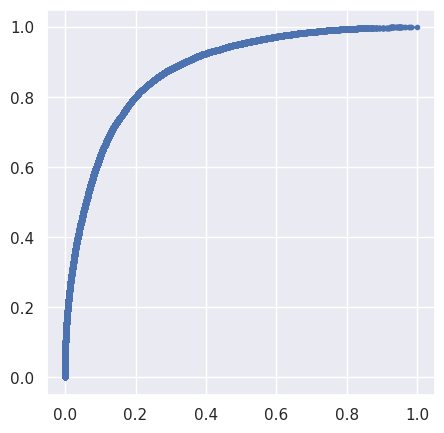

In [ ]:
x_test=test[features_use]
y_test=test['moroso']
check_train_test_auc(x_train = train[features_use], y_train = train['moroso'],
                     x_test = test[features_use] , y_test = test['moroso'])

## Analiza el modelo con test data

In [ ]:
test['CreditScore'] = (lr.predict_proba(test[features_use])[:, 1]*1000)
test_probs= lr.predict_proba(test[features_use])[:, 1]
#test_dos = lr.predict_proba(x_test)
test_pred = lr.predict(x_test)

In [ ]:
test.head()

,CantidadCreditos,ingreso_mensual_total,edad,dias_ultimo_credito,moroso,tipoMora_M12,tipoMora_M30,tipoMora_M60,tipoMora_M90,tipoMora_MTP,categoria_DNI,categoria_JUBILADO,categoria_RECIBO,situacionBCRA_1.0,situacionBCRA_3.0,situacionBCRA_4.0,situacionBCRA_5.0,CreditScore
183289,-0.595398,-0.141598,-0.010184,-0.421059,0,0,0,0,0,0,1,0,0,0,0,0,0,519.118618
183800,-0.595398,-0.141598,-1.235611,-0.428054,0,0,0,0,0,0,1,0,0,0,0,0,0,688.303761
20114,0.566918,-0.001337,0.183305,-0.966653,0,0,0,0,0,0,0,0,1,1,0,0,0,58.859322
131912,-0.595398,-0.141598,-1.171114,0.537227,1,0,0,0,0,0,1,0,0,1,0,0,0,606.459226
41860,1.341795,-0.141598,2.440670,-0.172744,1,0,0,0,0,0,1,0,0,1,0,0,0,62.698684


In [ ]:
print('Log loss = {:.5f}'.format(log_loss(y_test, test_probs)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_probs)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_probs)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred)))

print('\nClassification Report')
print(classification_report(y_test, test_pred))

Log loss = 0.43571
AUC = 0.87890
Average Precision = 0.87394

Using 0.5 as threshold:
Accuracy = 0.80129
Precision = 0.79528
Recall = 0.80991
F1 score = 0.80253

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80     47435
           1       0.80      0.81      0.80     47163

    accuracy                           0.80     94598
   macro avg       0.80      0.80      0.80     94598
weighted avg       0.80      0.80      0.80     94598



In [ ]:
#from sklearn.metrics import plot_confusion_matrix

print('Confusion Matrix')
confusion_matrix(y_test, test_pred)

Confusion Matrix


array([[37602,  9833],
       [ 8965, 38198]])

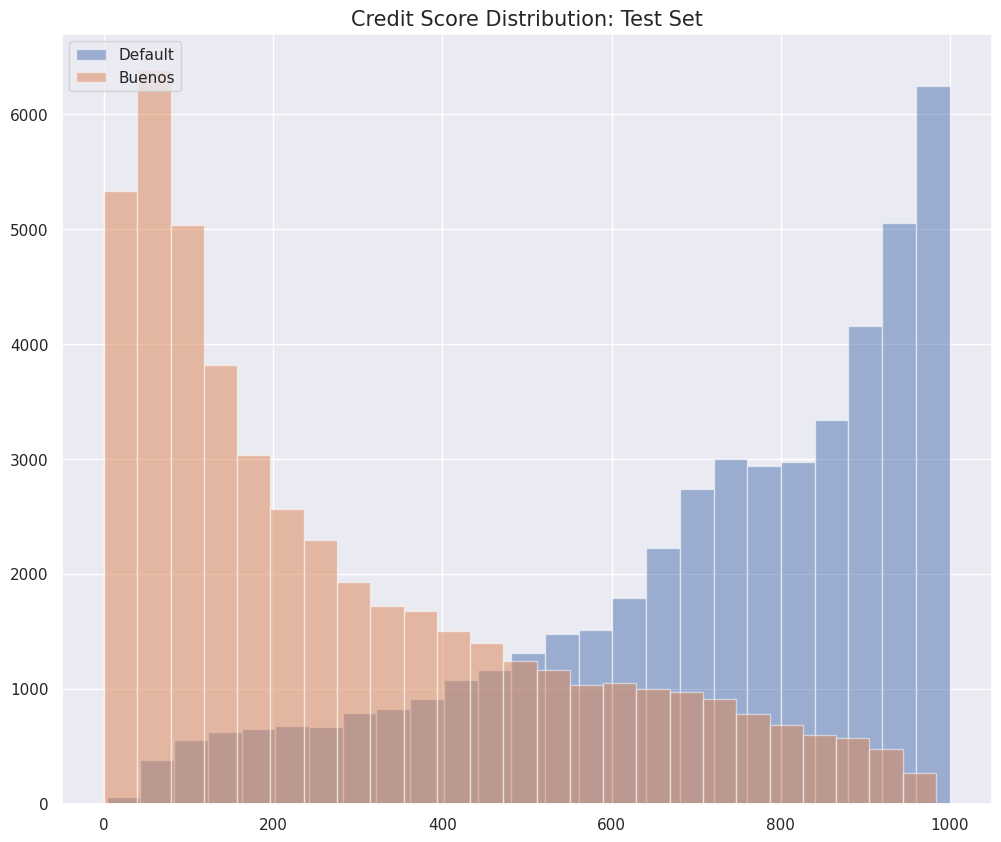

In [ ]:
import math
plt.figure(figsize = (12,10))
w = 40
n = math.ceil(( test['CreditScore'].max() - test['CreditScore'].min() ) / w )

plt.hist(test[test.moroso == 1].CreditScore, alpha = 0.5, label = 'Default', bins = n)
plt.hist(test[test.moroso == 0].CreditScore, alpha = 0.5, label = 'Buenos', bins = n)
plt.legend(loc = 'upper left')
plt.title('Credit Score Distribution: Test Set', size = 15)
plt.show()